# Statistics 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv", names=["name", "income"], skiprows=[0])
df

,name,income
0,A,5000
1,B,6000
2,C,4000
3,D,7500
4,E,8000
5,F,7000
6,G,10000000


In [3]:
df.describe()

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


## Percentile

In [4]:
df.income.quantile(0.75)

7750.0

In [5]:
df.income.quantile(0.75, interpolation = "lower")

7500

In [6]:
df.income.quantile(0.75, interpolation = "higher")

8000

In [7]:
df.income.quantile(1)

10000000.0

In [8]:
percentile_99 = df.income.quantile(0.99)
percentile_99

9400479.999999994

In [9]:
# remove outlier
df_no_outlier = df[df.income <= percentile_99]
df_no_outlier

,name,income
0,A,5000
1,B,6000
2,C,4000
3,D,7500
4,E,8000
5,F,7000


## Mean, Median & Mode

In [10]:
# work with missing value
df

,name,income
0,A,5000
1,B,6000
2,C,4000
3,D,7500
4,E,8000
5,F,7000
6,G,10000000


In [11]:
df["income"][3] = np.NaN

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10932\783890398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income"][3] = np.NaN


In [12]:
df

,name,income
0,A,5000.0
1,B,6000.0
2,C,4000.0
3,D,NaN
4,E,8000.0
5,F,7000.0
6,G,10000000.0


In [13]:
df.income.mean()

1671666.6666666667

In [14]:
df_new = df.fillna(df.income.median())
df_new

,name,income
0,A,5000.0
1,B,6000.0
2,C,4000.0
3,D,6500.0
4,E,8000.0
5,F,7000.0
6,G,10000000.0


## Normal Distribution

In [15]:
df1 = pd.read_csv("weight-height.csv")
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
df1.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

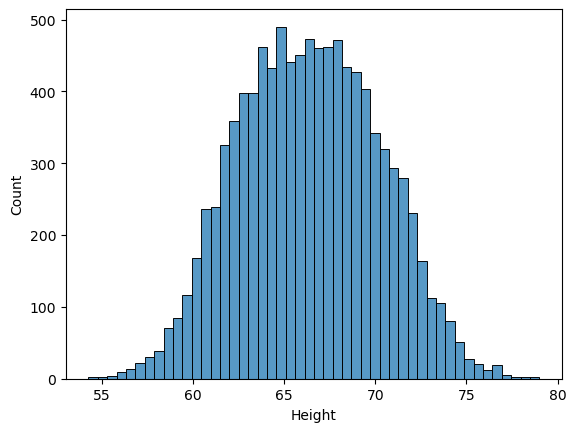

In [17]:
sn.histplot(df1.Height)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

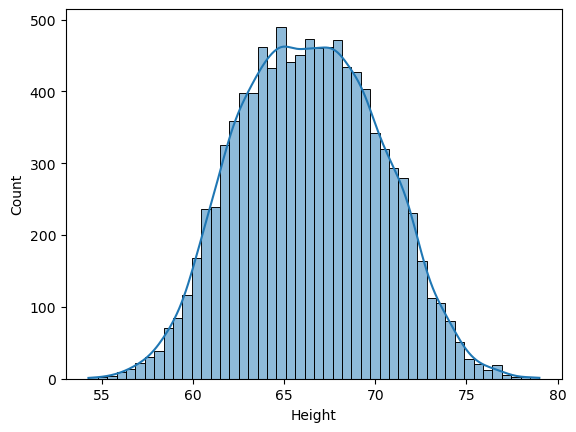

In [18]:
sn.histplot(df1.Height, kde= True)

In [19]:
mean = df1.Height.mean()
mean

66.36755975482124

In [20]:
std_deviation = df1.Height.std();
std_deviation

3.8475281207732324

In [21]:
minusThreeSTD = mean - 3*std_deviation
minusThreeSTD

54.82497539250154

In [22]:
plusThreeSTD = mean + 3*std_deviation
plusThreeSTD

77.91014411714094

In [23]:
# outliers
df1 [(df1.Height < minusThreeSTD) | (df1.Height > plusThreeSTD)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [24]:
# remove outliers using reverse condition
df1_no_outlier = df1 [(df1.Height > minusThreeSTD) & (df1.Height < plusThreeSTD)]
df1_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [25]:
df1_no_outlier.shape

(9993, 3)

### Z Score

In [26]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [27]:
df1['z_score'] = (df1.Height - df1.Height.mean()) / df1.Height.std()
df1.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [28]:
# outliers
df1[(df1.z_score < -3) | (df1.z_score > 3)]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [29]:
# remove outliers using reverse condition
df1_no_outlier = df1[(df1.z_score > -3) & (df1.z_score < 3)]
df1_no_outlier.shape

(9993, 4)

## Logarithm

In [30]:
df2 = pd.read_csv("revenue.csv")
df2

,company,revenue
0,A,31.0
1,B,11.0
2,C,386.0
3,D,4.7
4,E,5.6
5,F,11.3


<Axes: xlabel='company'>

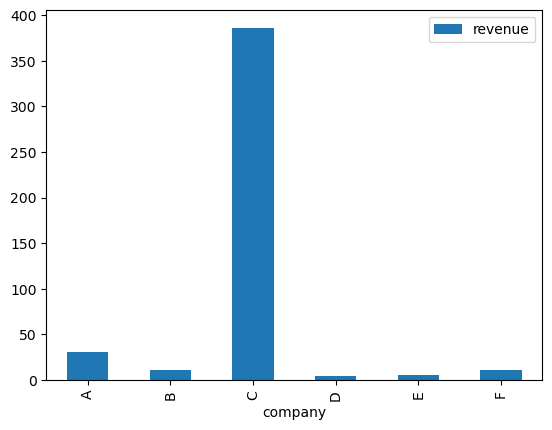

In [36]:
df2.plot(x='company', y='revenue', kind='bar')

<Axes: xlabel='company'>

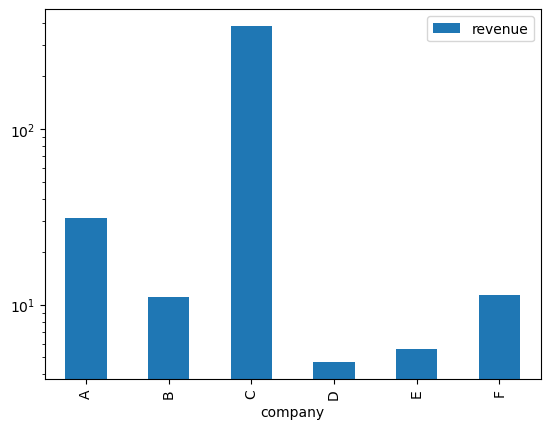

In [37]:
df2.plot(x='company', y='revenue', kind='bar', logy=True)